Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Все новые комментарии обозначены фразой "ревью 3".
* Удачи в дальнейшем обучении и следующих работах!

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Рассмотрим два варианта проекта без BERT и с BERT**

# Подготовка

## Подключение библиотеки

In [1]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Для визуализации временных рядов
import plotly.graph_objects
import seaborn as sb
from scipy import stats as st
# Время обучения модели
import timeit
# Тренды и сезонность
from statsmodels.tsa.seasonal import seasonal_decompose
# Проверка на стационарность
from statsmodels.tsa.stattools import adfuller, kpss
# Проверка на дисперсию с помощью теста Андерсона-Дарлинга
from scipy.stats import anderson
# XGBRegressor
import xgboost as xgb

# Работа с текстами
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from lightgbm import LGBMRegressor
# Вызов библиотеки для отключения предупреждения
import warnings

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, TimeSeriesSplit
# Применим кроссвалидацию для повышения качеств обучения



# Масштабируемость модели
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# Для машинного обучения разными способами:
# - Логическая регрессия
from sklearn.linear_model import LogisticRegression
# - Случайный лес
from sklearn.ensemble import RandomForestClassifier
# - Решающее дерево
from sklearn.tree import DecisionTreeClassifier
# - Модель на адекватность
from sklearn.dummy import DummyClassifier
# - Бустинг модель
from catboost import CatBoostClassifier

from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error,
    mean_absolute_error,
    fbeta_score, 
    make_scorer
)

# Контроль выборки
from sklearn.utils import shuffle

# Для лематизации текстов
import re
from pymystem3 import Mystem
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Для машинного обучения - деление выборки на обучающие и валидационные
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Просмотр все значений метрики
from sklearn.metrics import classification_report

from sklearn import svm
import joblib

Для машинного обучения с BERT

In [113]:
from torch import cuda

# Библиотеки для обучения с применением технологий BERT
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, подправил
</div>

## Загрузим данные

In [4]:
# Получаем датасет
try:
    # С локального файла
    try:
        # Сразу устанавливаем время как индексы
        df = pd.read_csv('toxic_comments.csv', index_col=[0], parse_dates=[0])
    except:
        df = pd.read_csv('/datasets/toxic_comments.csv', index_col=[0], parse_dates=[0])
except:
    print('Отсутствует датасет. Проверьте путь файла')

## Изучим данные

In [5]:
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


None

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Как и видим, что текст написан на английском языке

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корреткно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> В задачах классификации желательно изучать баланс классов. При этом, необязательно с ним бороться – это поле для экспериментов (качество может как улучшиться, так и ухудшиться).
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Добавил изучение балансы классов, а что по поводу борьбы с этим классом, пожалуйста, подробнее как делать? Имеешь ввиду, что существуют некоторые жаргоны, которые машина не может определить тип класса: позитивный и токсичный?
</div>

### Изучим балансы классов

Text(0.5, 0, 'Токсичные и позитивные комментарии')

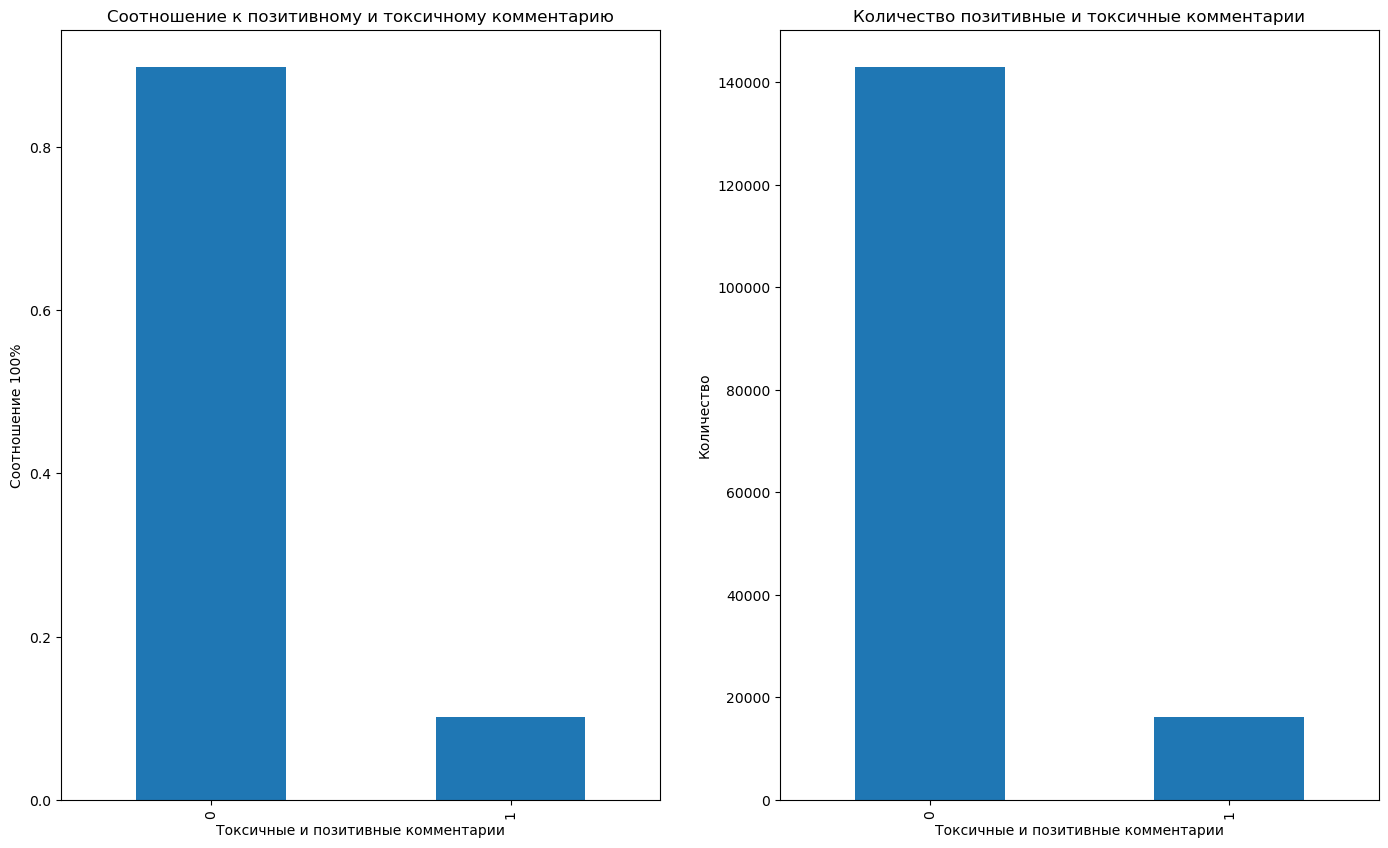

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(17, 10))

df['toxic'].value_counts(normalize=True).plot(ax=axs[0], kind='bar')
axs[0].set_title('Соотношение к позитивному и токсичному комментарию')
axs[0].set_ylabel('Соотношение 100%')
axs[0].set_xlabel('Токсичные и позитивные комментарии')
        
df['toxic'].value_counts().plot(ax=axs[1], kind='bar')
axs[1].set_title('Количество позитивные и токсичные комментарии')
axs[1].set_ylabel('Количество')
axs[1].set_xlabel('Токсичные и позитивные комментарии')

Как и видим, что много токсичных комментариев нежели позитивных. Дальше идем

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Предобработка данных

### Установка стоп-слово и другие словари

In [7]:
# Получим стоп-слово
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Лемматизируем текст

In [9]:
WNL = WordNetLemmatizer()

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Papin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
# Функция очистки лишних символов
def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = ' '.join(text.split())
    return text

In [12]:
df['lemm_text'] = df['text'].apply(clear_text)

In [13]:
df['lemm_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now'

In [14]:
df.head(3)

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...


## Разделим на обучающую и тестовую выборку

In [15]:
# Деление обучающей выборки на признаки и целевые признаки
features = df.drop(['toxic', 'text'], axis=1)
target = df['toxic']

In [16]:
# Разделим обучающую и тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [17]:
print('Размер обучающей выборки:', round(features_train.shape[0] / df.shape[0], 3), '%')
print('Размер тестовой выборки:', round(features_test.shape[0] / df.shape[0], 3), '%')

Размер обучающей выборки: 0.75 %
Размер тестовой выборки: 0.25 %


## Предобработка данных

In [18]:
# Создаем корпус текстов
corpus_train = list(features_train['lemm_text'])
corpus_test = list(features_test['lemm_text'])

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Приводить тексты к юникоду не имеет смысла, так как они все на английском. Это может привести к падению ядра из-за увеличения объема занимаемой памяти.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, подправил
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [19]:
print('Corpus_train')
display(corpus_train[0])
print()
print('Corpus_test')
display(corpus_test[0])

Corpus_train


'that makes no sense you don t play maplestory through internet explorer sure the website can only be accessible through ie well you can access it through firefox as well if you know what to do but it s not really part of the game'


Corpus_test


'expert categorizers why is there no mention of the fact that nazis were particularly great categorizers they excelled in identifying various things and writing about them and putting them in their proper places'

## Создание корпуса текстов с обучающей и тестовой выборки

### Обучающая выборка

In [20]:
# По аналогии с CountVectorizer() создадим счётчик, указав в нём стоп-слова:
count_tf_idf_train = TfidfVectorizer(stop_words=list(stopwords))

In [21]:
# Чтобы посчитать TF-IDF для корпуса текстов, вызовем функцию fit_transform():
tf_idf_train = count_tf_idf_train.fit_transform(corpus_train) 
# Передав TfidfVectorizer() аргумент ngram_range, можно рассчитать N-граммы.

In [22]:
print("Размер матрицы обучающей выборки:", tf_idf_train.shape)

Размер матрицы обучающей выборки: (119469, 142039)


### Тестовая выборка

In [23]:
# По аналогии с CountVectorizer() создадим счётчик, указав в нём стоп-слова:
count_tf_idf_test = TfidfVectorizer(stop_words=list(stopwords))

In [24]:
# Чтобы посчитать TF-IDF для корпуса текстов, вызовем функцию fit_transform():
tf_idf_test = count_tf_idf_train.transform(corpus_test) 
# Передав TfidfVectorizer() аргумент ngram_range, можно рассчитать N-граммы.

In [25]:
print("Размер матрицы тестовой выборки:", tf_idf_test.shape)

Размер матрицы тестовой выборки: (39823, 142039)


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано верно. Отлично, что векторизатор был обучен только на тренировочной части данных.
</div>

# Машинное обучение

In [26]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

## Функции

**Создаем функцию, которая упрощает написание кода**

### Обучение модели

In [27]:
# Обучение модели
def fit_model(model, features_train, target_train):
    # Обучим модель на обучающей выборке
    model.fit(features_train, target_train)

    # Узнаем RMSE обучающей выборки
    F1_TRAIN = model.best_score_
    print('F1 TRAIN:', round(F1_TRAIN, 3))
    print('TIME TRAIN [s]:', round(model.refit_time_, 3))
    
    return F1_TRAIN

### Предсказание модели

In [28]:
# Предсказание модели
def predict_model(model, features_test, target_test):
    start_time = timeit.default_timer()
    # Получим предсказания на тестовой выборки
    predictions = model.predict(features_test)

    elapsed = round(timeit.default_timer() - start_time, 3)

    # Узнаем RMSE
    F1_VALID = f1_score(target_test, predictions)
    print('F1 VALID:', round(F1_VALID, 3))
    print('Предсказание:', round(predictions.mean(), 3))
    
    return predictions, elapsed, F1_VALID

### Сохранение результатов

In [49]:
# Зафиксируем результаты
def save_result(name, F1_TRAIN, refit_time_, best_params_, count_model, show_display=False):
    results[count_model] = pd.Series({
        'NAME': f'{name}', 
        'F1 TRAIN': F1_TRAIN,
        'TIME TRAINING [s]': refit_time_,
        'PARAMETRS': best_params_
    })
    
    if(show_display == True): display(results[count_model])

### График ROC-кривая

In [30]:
def display_aus_roc(model, tf_idf_test, target_test):
    probabilities_test = model.predict_proba(tf_idf_test)
    probabilities_one_test = probabilities_test[:, 1]

    auc_roc = roc_auc_score(target_test, probabilities_one_test)

    # Изображаем ROC-кривую
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

    plt.figure()

    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()
    
    print('ROC AUC:', auc_roc)

### График распределения плотности предсказанных и истинных значений

In [31]:
def display_graph_predicted_and_target(target_train, predictions, F1_VALID, x_pos, y_pos):
    plt.figure(figsize=(10, 5))
    # Целевой признак
    target_train.plot(kind='kde', linewidth=2)
    # Предсказания
    pd.Series(predictions).plot(kind='kde',linewidth=2)
    
    plt.title('График распределения плотности предсказанных и истинных значений')
    plt.legend(['Истинные значения','Предсказанные значения'], fontsize='large')
    
    plt.text(x_pos, y_pos, f'F1= {round(F1_VALID, 3)}')
    plt.xlabel('')
    plt.ylabel('Плотность')
    
    plt.show()

## LogisticRegression

### Установка параметров

In [47]:
pipe_lr = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('LogisticRegression', LogisticRegression(solver='lbfgs', max_iter=500, random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_lr = [{
    'LogisticRegression__penalty': ['l1', 'l2'],
    'LogisticRegression__C': np.logspace(-2, 2, 5),
    'LogisticRegression__solver': ['liblinear']
}]

model = GridSearchCV(
    estimator=pipe_lr,
    param_grid=grid_params_lr,
    scoring='f1',
    cv=5
) 

### Обучение

In [48]:
%%notify -m 'LogisticRegression'
%%time

F1_TRAIN = fit_model(model, corpus_train, target_train)

F1 TRAIN: 0.765
TIME TRAIN [s]: 8.169
CPU times: total: 8min 2s
Wall time: 5min 57s


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Хорошо, добавил Pipeline
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно.
</div>

In [50]:
# Зафиксируем результаты
save_result('LogisticRegression', F1_TRAIN, model.refit_time_, model.best_params_, count_model, show_display=True)
count_model+=1

NAME                                                LogisticRegression
F1 TRAIN                                                      0.765019
TIME TRAINING [s]                                             8.168902
PARAMETRS            {'LogisticRegression__C': 10.0, 'LogisticRegre...
Name: 0, dtype: object

### ROC-кривая

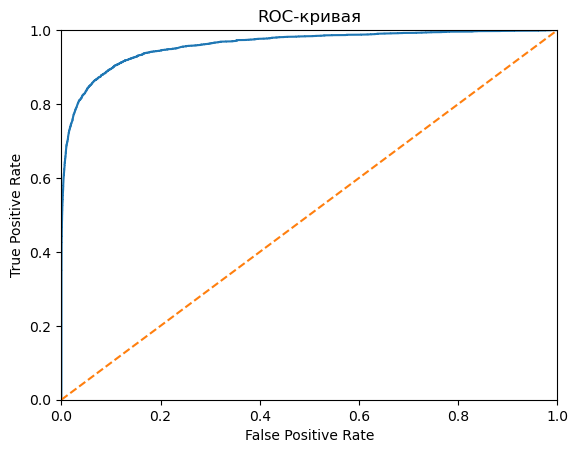

ROC AUC: 0.9604915640633652


In [51]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC получилось очень идеальной, близок к 1

## RandomForestClassifier

### Установка параметров

In [53]:
pipe_rf = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('RandomForestClassifier', RandomForestClassifier(random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_rf = [{
    'RandomForestClassifier__criterion': ['gini', 'entropy'],
    'RandomForestClassifier__max_depth': [5, 20],
    'RandomForestClassifier__min_samples_split': [5, 10],
    'RandomForestClassifier__n_estimators': [10, 20],
    'RandomForestClassifier__max_features': ['sqrt', 'log2'],
    'RandomForestClassifier__bootstrap': [True, False]
}]

model = GridSearchCV(
    estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

### Обучение

In [54]:
%%notify -m 'RandomForestClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

F1 TRAIN: 0.022
TIME TRAIN [s]: 6.343
CPU times: total: 3min 28s
Wall time: 7min 43s


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-danger">

<b>Ошибка:</b> На тестовой выборке нужно измерить только одну – лучшую модель. Сравнение моделей нужно провести только на кросс-валидации `grid.best_score_` (с одним и тем же параметром "cv") или только на валидационной выборке.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> Разве GirdSearchCV автоматически сохраняет лучшие гиперпараметры, и что можно сразу провести на тест?
</div>

<div class="alert alert-block alert-danger">

<b>Ошибка (ревью 2):</b> Да, они сохраняются в `grid.best_params_`.
    
Ошибка выше не исправлена. target_test можно использовать только один раз за проект.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V3:</b> Сижу и думаю, и теперь до меня дошло. Результат F1-SCORE на тестовой выборки приведен перед выводом 
</div>

F1 метрика совсем сильно упала, почти в 100 раз, очень странно получилось, дальше смотрим

In [55]:
# Зафиксируем результаты
save_result('RandomForestClassifier', F1_TRAIN, model.refit_time_, model.best_params_, count_model, show_display=True)
count_model+=1

NAME                                            RandomForestClassifier
F1 TRAIN                                                      0.022039
TIME TRAINING [s]                                             6.342723
PARAMETRS            {'RandomForestClassifier__bootstrap': True, 'R...
Name: 1, dtype: object

### ROC-кривая

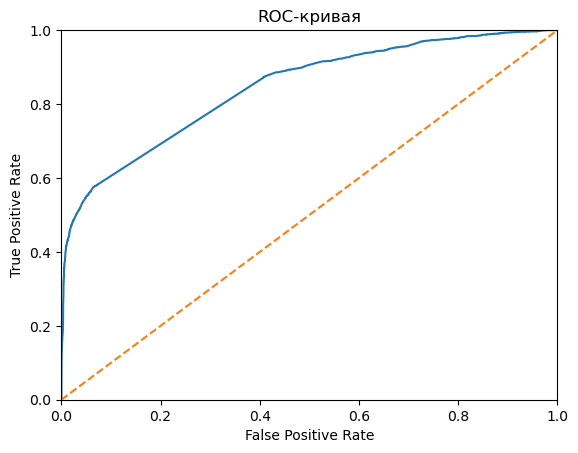

ROC AUC: 0.8435407711849274


In [56]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC получилось хорошей, около 0,82

## DecisionTreeClassifier

### Установка параметров

In [57]:
pipe_dt = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=12345))
])
                   
# Подбор гиперпараметров для обучения
grid_params_dt = [{
    'DecisionTreeClassifier__max_depth': [5, 20],
    'DecisionTreeClassifier__min_samples_leaf': [0.5, 1]
}]

model = GridSearchCV(
    estimator=pipe_dt,
    param_grid=grid_params_dt,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

### Обучение 

In [58]:
%%notify -m 'DecisionTreeClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

F1 TRAIN: 0.642
TIME TRAIN [s]: 19.974
CPU times: total: 26.9 s
Wall time: 1min 23s


<IPython.core.display.Javascript object>

In [59]:
# Зафиксируем результаты
save_result('DecisionTreeClassifier', F1_TRAIN, model.refit_time_, model.best_params_, count_model, show_display=True)
count_model+=1

NAME                                            DecisionTreeClassifier
F1 TRAIN                                                      0.641929
TIME TRAINING [s]                                            19.973559
PARAMETRS            {'DecisionTreeClassifier__max_depth': 20, 'Dec...
Name: 2, dtype: object

### ROC-кривая

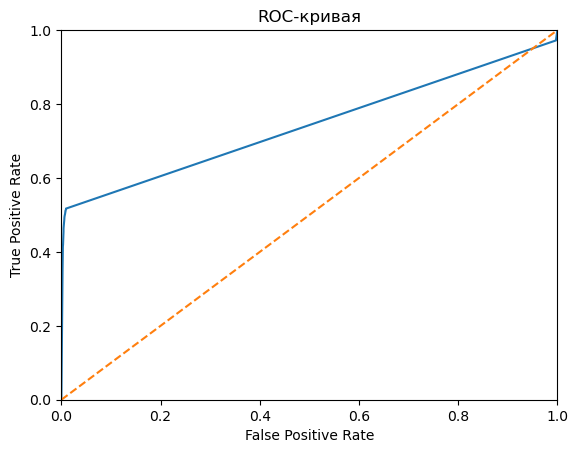

ROC AUC: 0.74210201935063


In [60]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC тоже получилось хорошей, около 0,74

## CatBoostClassifier

### Установка параметров

In [61]:
pipe_cbc = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('CatBoostClassifier', CatBoostClassifier())
])
                   
# Подбор гиперпараметров для обучения
grid_params_cbc = [{
    'CatBoostClassifier__depth': [5],
    'CatBoostClassifier__learning_rate': [0.05],
    'CatBoostClassifier__iterations': [10]
}]

model = GridSearchCV(
    estimator=pipe_cbc,
    param_grid=grid_params_cbc,
    scoring='f1',
    cv=5,
    n_jobs=-1
) 

### Обучение

In [62]:
%%notify -m 'CatBoostClassifier'
%%time

# Обучение модели
F1_TRAIN = fit_model(model, corpus_train, target_train)

0:	learn: 0.6422470	total: 593ms	remaining: 5.34s
1:	learn: 0.5979785	total: 1.03s	remaining: 4.14s
2:	learn: 0.5563988	total: 1.5s	remaining: 3.5s
3:	learn: 0.5213179	total: 2.08s	remaining: 3.12s
4:	learn: 0.4900835	total: 2.59s	remaining: 2.59s
5:	learn: 0.4617202	total: 3.22s	remaining: 2.15s
6:	learn: 0.4364283	total: 3.75s	remaining: 1.61s
7:	learn: 0.4155876	total: 4.28s	remaining: 1.07s
8:	learn: 0.3958446	total: 4.78s	remaining: 532ms
9:	learn: 0.3786744	total: 5.26s	remaining: 0us
F1 TRAIN: 0.438
TIME TRAIN [s]: 18.128
CPU times: total: 1min 22s
Wall time: 57.6 s


<IPython.core.display.Javascript object>

In [63]:
# Зафиксируем результаты
save_result('CatBoostClassifier', F1_TRAIN, model.refit_time_, model.best_params_, count_model, show_display=True)
count_model+=1

NAME                                                CatBoostClassifier
F1 TRAIN                                                      0.438484
TIME TRAINING [s]                                            18.127697
PARAMETRS            {'CatBoostClassifier__depth': 5, 'CatBoostClas...
Name: 3, dtype: object

### ROC-кривая

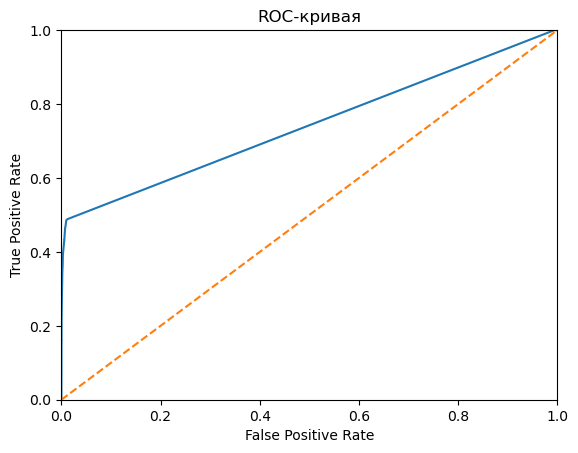

ROC AUC: 0.7417824401689578


In [64]:
display_aus_roc(model, corpus_test, target_test)

_*Примечание*_

Интервал AUC и качество модели
- 0,9 - 1,0 Отличное
- 0,8 - 0,9 Очень хорошее
- 0,7 - 0,8 Хорошее
- 0,6 - 0,7 Среднее
- 0,5 - 0,6 Неудовлетворительное

Здесь значение ROC-AUC тоже получилось очень хорошей, около 0,88

# Проверка на тестовой выборке лучших моделей

## Результаты F1-SCORE

In [65]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [66]:
# Смотрим все результаты обучения
results

,NAME,F1 TRAIN,TIME TRAINING [s],PARAMETRS
0,LogisticRegression,0.765019,8.168902,"{'LogisticRegression__C': 10.0, 'LogisticRegre..."
1,RandomForestClassifier,0.022039,6.342723,"{'RandomForestClassifier__bootstrap': True, 'R..."
2,DecisionTreeClassifier,0.641929,19.973559,"{'DecisionTreeClassifier__max_depth': 20, 'Dec..."
3,CatBoostClassifier,0.438484,18.127697,"{'CatBoostClassifier__depth': 5, 'CatBoostClas..."


In [67]:
# Нам интересует F1 не менее 0.75, тогда
best_results = results[results['F1 TRAIN'] > 0.75]
best_results

,NAME,F1 TRAIN,TIME TRAINING [s],PARAMETRS
0,LogisticRegression,0.765019,8.168902,"{'LogisticRegression__C': 10.0, 'LogisticRegre..."


Лучшей моделей оказалсь `LogisticRegression`, проверим на тестовой выборке

## Машинное обучение

### Установка лучших гиперпараметров для лучшей моделей

In [72]:
# Инициализируем лушчую модель с таким же параметром
pipe_lr = Pipeline([
    # Преобразуем в численный тип - векторизацию
    ('CountVectorizer', CountVectorizer(vocabulary=count_tf_idf_train.vocabulary_)),
    # Трансформируем их
    ('TfidfTransformer', TfidfTransformer()),
    # Применяем метод Логической регрессии для обучения
    ('LogisticRegression', LogisticRegression(solver='lbfgs', max_iter=500, random_state=12345))
])

In [100]:
best_results['PARAMETRS'][0]

{'LogisticRegression__C': 10.0,
 'LogisticRegression__penalty': 'l1',
 'LogisticRegression__solver': 'liblinear'}

In [75]:
%%time

# Устанавливаем лучшие гиперпараметры для лучшей модели
pipe_lr.set_params(**best_results['PARAMETRS'][0]) 

Pipeline(steps=[('CountVectorizer',
                 CountVectorizer(vocabulary={'aa': 0, 'aaa': 1, 'aaaa': 2,
                                             'aaaaa': 3, 'aaaaaaaa': 4,
                                             'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany': 5,
                                             'aaaaaaaaaahhhhhhhhhhhhhh': 6,
                                             'aaaaaaaaadm': 7, 'aaaaaaaaaq': 8,
                                             'aaaaaaaacfo': 9,
                                             'aaaaaaaaczy': 10,
                                             'aaaaaaaari': 11,
                                             'aaaaaaaayui': 12,
                                             'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh': 13,...
                                             'aaaannnnyyyywwwwhhhheeeerrrreeee': 16,
                                             'aaaawwww': 17, 'aaaboyz': 18,
                                             'aaages': 19, 'aaaghh': 20,
                                             'aaah': 21, 'aaahhh': 22,
                                             'aaahs': 23, 'aaai': 24,
                                             'aaajade': 25, 'aaand': 26,
                                             'aaarrrgggh': 27, 'aaaww': 28,
                                             'aaberg': 29, ...})),
                ('TfidfTransformer', TfidfTransformer()),
                ('LogisticRegression',
                 LogisticRegression(C=10.0, max_iter=500, penalty='l1',
                                    random_state=12345, solver='liblinear'))])

### Обучение

In [79]:
%%notify -m 'BEST_MODEL_TRAINED'
%%time

# Обучим модель на обучающей выборке
pipe_lr.fit(corpus_train, target_train)

CPU times: total: 7.41 s
Wall time: 7.66 s


Pipeline(steps=[('CountVectorizer',
                 CountVectorizer(vocabulary={'aa': 0, 'aaa': 1, 'aaaa': 2,
                                             'aaaaa': 3, 'aaaaaaaa': 4,
                                             'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany': 5,
                                             'aaaaaaaaaahhhhhhhhhhhhhh': 6,
                                             'aaaaaaaaadm': 7, 'aaaaaaaaaq': 8,
                                             'aaaaaaaacfo': 9,
                                             'aaaaaaaaczy': 10,
                                             'aaaaaaaari': 11,
                                             'aaaaaaaayui': 12,
                                             'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh': 13,...
                                             'aaaannnnyyyywwwwhhhheeeerrrreeee': 16,
                                             'aaaawwww': 17, 'aaaboyz': 18,
                                             'aaages': 19, 'aaaghh': 20,
                                             'aaah': 21, 'aaahhh': 22,
                                             'aaahs': 23, 'aaai': 24,
                                             'aaajade': 25, 'aaand': 26,
                                             'aaarrrgggh': 27, 'aaaww': 28,
                                             'aaberg': 29, ...})),
                ('TfidfTransformer', TfidfTransformer()),
                ('LogisticRegression',
                 LogisticRegression(C=10.0, max_iter=500, penalty='l1',
                                    random_state=12345, solver='liblinear'))])

<IPython.core.display.Javascript object>

### Предсказание модели

In [80]:
%%notify -m 'BEST_MODEL_PREDICT'
%%time

predictions, elacorpus_test, F1_VALID = predict_model(pipe_lr, corpus_test, target_test)

F1 VALID: 0.779
Предсказание: 0.087
CPU times: total: 1.67 s
Wall time: 1.78 s


<IPython.core.display.Javascript object>

## График распределения плотности предсказанных и истинных значений

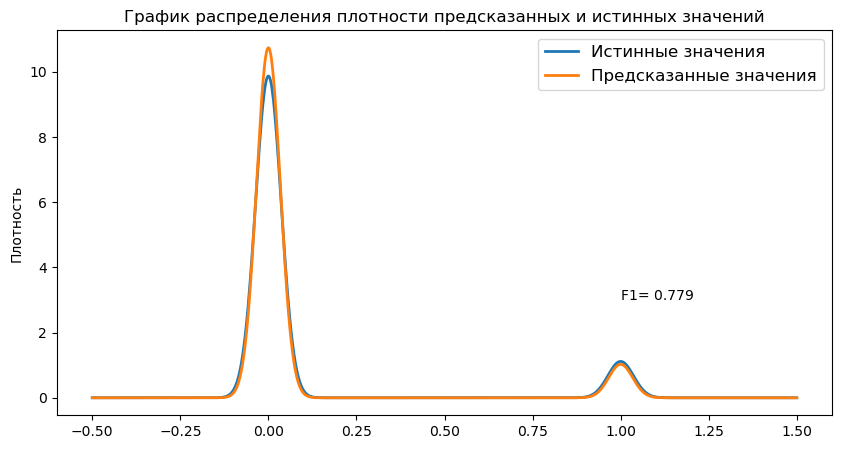

In [86]:
display_graph_predicted_and_target(target_test, predictions, F1_VALID, 1, 3)

Результат оказался оптимальным, т.е. F1 = 0,779

# Вывод

Самой лучшей моделей является LogisticRegression - F1 на тестовой выборки составляет `0.779`, а скорость обучения составляет аж **8 секунды**, время предсказания - **0,087 секунда**. 

Вполне очень акдеватный результат, чтобы выбрать эту модель для реализации. 

Есть другая модель, но, к сожалению, не попал в топ, т.к. метрика F1 ниже заявленного - `0,75`.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге! Но есть ошибка с тестированием, которую я обозначил выше.
</div>

# Машинное обучение с BERT

In [114]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Sat Apr 15 14:32:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   36C    P8                1W /  N/A|    345MiB /  4096MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [115]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device == torch.device('cpu'):
    print('Using CPU')
else:
    n_gpu = torch.cuda.device_count()
    print('Using {} GPUs'.format(torch.cuda.get_device_name(0)))

Using CPU


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> подключает только к процессору(. Я установил все необходимые инструменты, включая CUDA
</div>

## Получение датасета

In [333]:
# Получаем датасет
try:
    # С локального файла
    try:
        # Сразу устанавливаем время как индексы
        df = pd.read_csv('toxic_comments.csv', index_col=[0], parse_dates=[0])
    except:
        df = pd.read_csv('/datasets/toxic_comments.csv', index_col=[0], parse_dates=[0])
except:
    print('Отсутствует датасет. Проверьте путь файла')

In [334]:
df_bert = df.copy()

In [335]:
display(df_bert.head(), df_bert.tail())

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


,text,toxic
159446,""":::::And for the second time of asking, when ...",0
159447,You should be ashamed of yourself \n\nThat is ...,0
159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159449,And it looks like it was actually you who put ...,0
159450,"""\nAnd ... I really don't think you understand...",0


## Предобработка данных

Мы начнем с определения нескольких ключевых переменных, которые будут использоваться позже на этапе обучения/тонкой настройки. 

Затем создадим класс CustomDataset, который определяет, как текст предварительно обрабатывается перед отправкой в нейронную сеть. 

Также определим загрузчик данных, который будет пакетами передавать данные в нейронную сеть для подходящего обучения и обработки. 

Dataset и Dataloader - это конструкции библиотеки PyTorch для определения и управления предварительной обработкой данных и их передачей в нейронную сеть. 

Для дальнейшего ознакомления с Dataset и Dataloader нам следует ознакомиться с документами на [PyTorch](https://pytorch.org/docs/stable/data.html)

### *CustomDataset* Dataset Class
- Этот класс определен для приема `tokenizer`, `dataframe` и `max_length` в качестве входных данных и генерации токенизированных выходных данных и тегов, которые используются моделью BERT для обучения.
- Мы используем токенизатор BERT для токенизации данных в столбце `comment_text` фрейма данных.
- Токенизатор использует метод `encode_plus` для выполнения токенизации и генерации необходимых выходных данных, а именно: `ids`, `attention_mask`, `token_type_ids`
---
- *Это первое различие между distilbert и bert, где токенизатор генерирует token_type_ids в случае Bert*
---
- Чтобы подробнее ознакомиться с токенизатором, [обратитесь к этому документу](https://huggingface.co/transformers/model_doc/bert.html#berttokenizer )
- "targest" - это список категорий, помеченных как "0" или "1" во фрейме данных.
- Класс *CustomDataset* используется для создания 2 наборов данных, для обучения и для проверки.
- *Обучающий набор данных * используется для точной настройки модели: **80% исходных данных**
- *Набор данных для проверки* используется для оценки производительности модели. Модель не видела этих данных во время обучения.

### Dataloader
- Dataloader используется для создания обучающего и валидационного загрузчика данных, который загружает данные в нейронную сеть определенным образом. Это необходимо, потому что все данные из набора данных не могут быть загружены в память сразу, следовательно, необходимо контролировать объем данных, загружаемых в память и затем передаваемых в нейронную сеть.
- Это управление достигается с помощью таких параметров, как `batch_size` и `max_len`.
- Загрузчики данных обучения и валидации используются в части обучения и валидации потока соответственно

In [342]:
# Разделы конфигурации

# Определение некоторых ключевых переменных, которые будут использоваться позже в ходе обучения
MAX_LEN = 200
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 2
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [343]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.toxic
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

##  Деление на обучающей и тестовой выборки

In [344]:
train_size = 0.8

train_dataset=df_bert.sample(frac=train_size,random_state=200)
test_dataset=df_bert.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

In [345]:
print(f"Объем полного датасета: {df_bert.shape}")
print(f"Размер обучающей выборки: {train_dataset.shape}")
print(f"Размер тестовой выборки: {test_dataset.shape}")

Объем полного датасета: (159292, 2)
Размер обучающей выборки: (127434, 2)
Размер тестовой выборки: (31858, 2)


In [346]:
training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)

In [347]:
# Устанавливаем параметры
train_params = {
    'batch_size': TRAIN_BATCH_SIZE,
    'shuffle': True,
    'num_workers': 0
}

test_params = {
    'batch_size': VALID_BATCH_SIZE,
    'shuffle': True,
    'num_workers': 0
}

In [348]:
training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

## Создание нейронной сети для тонкой настройки

### Нейронная сеть
- Мы будем создавать нейронную сеть с `BERTClass`.
- У этой сети будет `Bert` модель. Далее следуют `Droput` и `Linear Layer`. Они добавлены с целью **Упорядочивания** и **Regulariaztion** соответственно.
- В прямом цикле есть 2 выходных данных из слоя `Bert Model`.
- Второй вывод `output_1` или называемый `объединенным выводом` передается в `Drop Out layer`, а последующий вывод передается в `Linear layer`.
- Обратите внимание, что количество измерений для "линейного слоя" равно **6** потому что это общее количество категорий, по которым мы хотим классифицировать нашу модель.
- Данные будут переданы в `BertClass`, как определено в наборе данных.
- Выходные данные конечного уровня - это то, что будет использоваться для расчета потерь и определения точности прогнозирования моделей.
- Мы инициируем экземпляр сети под названием `model`. Этот экземпляр будет использоваться для обучения, а затем для сохранения окончательной обученной модели для последующего вывода.
 
### Функция потерь и оптимизатор
- Потеря определяется в следующей ячейке как `loss_fn`.
- Как определено выше, используемая функция потерь будет представлять собой комбинацию двоичной перекрестной энтропии, которая реализована как [BCELogits Loss](https://pytorch.org/docs/stable/nn.html#bcewithlogitsloss ) в PyTorch
- `Optimizer` определен в следующей ячейке.
- `Optimizer` используется для обновления весов нейронной сети для повышения ее производительности.
 
### Для будущее
- Вы можете обратиться к моим [Pytorch Tutorials](https://github.com/abhimishra91/pytorch-tutorials ), чтобы получить представление о функции потерь и оптимизаторе.
- [Документация Pytorch для функции потерь](https://pytorch.org/docs/stable/nn.html#loss-functions )
- [Документация Pytorch для оптимизатора](https://pytorch.org/docs/stable/optim.html )
- Обратитесь к ссылкам, приведенным в верхней части блокнота, чтобы узнать больше о `BertModel`. 

In [354]:
# Создаем индивидуальную модель, добавляя отсев и плотный слой поверх distil bert, чтобы получить конечный результат для модели
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased', return_dict=False)
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 1)
    
    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [355]:
# Функция потери
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [356]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

### Точная настройка модели

После всех усилий по загрузке и подготовке данных и наборов данных, созданию модели и определению ее потерь и оптимизатора. Вероятно, это самый простой шаг в процессе.

Здесь мы определяем обучающую функцию, которая обучает модель на основе обучающего набора данных, созданного выше, заданное количество раз (ЭПОХА), эпоха определяет, сколько раз полные данные будут передаваться по сети.

Для точной настройки нейронной сети в этой функции происходят следующие события:
- Загрузчик данных передает данные в модель в зависимости от размера пакета.
- Последующие выходные данные модели и фактическая категория сравниваются для расчета потерь.
- Значение потерь используется для оптимизации весов нейронов в сети.
- После каждых 5000 шагов в консоли выводится значение потерь.

Как вы можете видеть, всего за 1 эпоху на последнем шаге модель работала с незначительными потерями в 0,022, т.е. выходной сигнал сети чрезвычайно близок к фактическому выходному сигналу.

In [365]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        
        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

## Обучение

In [160]:
%%notify -m 'BERT'
%%time

for epoch in range(EPOCHS):
    train(epoch)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2352: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch: 0, Loss:  0.733110785484314
Epoch: 0, Loss:  0.39082932472229004
Epoch: 0, Loss:  0.005783333443105221
Epoch: 0, Loss:  0.09499093890190125
Epoch: 1, Loss:  0.01712093874812126
Epoch: 1, Loss:  0.00039071450009942055
Epoch: 1, Loss:  0.322614461183548
Epoch: 1, Loss:  0.02024523913860321
CPU times: user 1h 41min 16s, sys: 53min 13s, total: 2h 34min 29s
Wall time: 2h 35min 39s


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V3:</b> В общем, код работает, но очень долго грузится (ждал около 2 часа), и не еще не закончился, что и мне было вынуждено прервать работу
</div>

<div class="alert alert-block alert-info">

Комментарий студента V1: У меня вопрос к ревью. Я сделал примерно то, что было по образцу с вебинара. Но здесь не указан конец шага, т.е. там вместо числа стоит `Unknown`. Получается, что здесь будет бесконечная итерация
    
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> https://datascience.stackexchange.com/questions/74168/epoch-1-5-wont-stop
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Вообще говоря, лучше использовать torch. Он намного более популярен сейчас. Вот специализированный БЕРТ для него: https://huggingface.co/unitary/toxic-bert
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> К сожалению нет смысла применять torch, т.к. у меня не получается подключить к видеокарте
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Торч можно запускать и на CPU. Подключить GPU на сервере не получится, а локально это довольно сложная задача.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V2:</b> 

Пробовал другой способ обучения через BERT, который ты прислал свыше, вначале, не получилось. Поискал в интернете, пока не нашел нормального источника информации о том, как правильно нужно обучать

Какие ресурсы я смотрел:
    https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/classify_text_with_bert.ipynb#scrollTo=HtfDFAnN_Neu
    https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=ru
    https://datascience.stackexchange.com/questions/74168/epoch-1-5-wont-stop
    https://www.youtube.com/watch?v=aKLcvGdOP6g
    https://medium.com/mlearning-ai/using-bert-with-pytorch-b9624edcda4e
    https://pytorch.org/tutorials/intermediate/dynamic_quantization_bert_tutorial.html
    https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial
    https://www.youtube.com/watch?v=7kLi8u2dJz0
    https://pysnacks.com/machine-learning/bert-text-classification-with-fine-tuning/

Все равно не получается
</div>

```
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```

<div class="alert alert-block alert-info">

<b>Совет (ревью 3): </b> Попробуй тогда запустить на этой платформе: https://www.kaggle.com/code/angyalfold/hugging-face-bert-with-custom-classifier-pytorch/notebook?scriptVersionId=64805713 . Сначала стоит запустить готовый ноутбук (он решает аналогичную задачу), а потом подменить данные на наши.
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> Вот тут есть множество примеров на гугл колабе. Там, кстати, можно запустить расчет на GPU: https://huggingface.co/transformers/v4.2.2/notebooks.html
</div>

<div class="alert alert-block alert-info">

Комментарий студента V1: И здесь аналогично
    
</div>

## Проверим на F1-метрику

На этапе проверки мы передаем невидимые данные (тестовый набор данных) в модель. Этот шаг определяет, насколько хорошо модель работает с невидимыми данными.

Эти невидимые данные составляют 20% от `train.csv`, которые были отделены на этапе создания набора данных.
На этапе проверки веса модели не обновляются. Только конечный результат сравнивается с фактическим значением. Это сравнение затем используется для расчета точности модели.

Как определено выше, чтобы получить оценку производительности наших моделей, мы используем следующие показатели.
- Accuracy Score
- F1-score
- F1-score MACRO
- F1-score MICRO

Мы получаем потрясающие результаты по всем этим 3 категориям, просто обучая модель в течение 1 эпохи.

In [ ]:
def validation(epoch):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [160]:
%%notify -m 'BERT'
%%time

for epoch in range(EPOCHS):
    train(epoch)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2352: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch: 0, Loss:  0.733110785484314
Epoch: 0, Loss:  0.39082932472229004
Epoch: 0, Loss:  0.005783333443105221
Epoch: 0, Loss:  0.09499093890190125
Epoch: 1, Loss:  0.01712093874812126
Epoch: 1, Loss:  0.00039071450009942055
Epoch: 1, Loss:  0.322614461183548
Epoch: 1, Loss:  0.02024523913860321
CPU times: user 1h 41min 16s, sys: 53min 13s, total: 2h 34min 29s
Wall time: 2h 35min 39s


<IPython.core.display.Javascript object>

# Выводы

F1-SCORE у модели BERT с помощью библиотеки PyTorch получилось очень неплохой, аж **0,841** значений. Однако у этой модели есть основные недостатки, от которых мы избегаем: время обучения и предсказаня. Время обучения занимает аж **1,5 часа** в среднем. А время предсказания меньше **1\4 часа**.

Если нам поставлена задача создать модель, которая дает высокие результаты, тогда нам следует применять глубокие обучения, в противном случае можно применять легкие модели и быстро получить результаты для предварительного прогнозирования.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны